### 1. Korelacijos nustatymas


In [7]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# Duomenų įkėlimas
df = pd.read_csv('./Data.txt', sep=" ", decimal='.')

# Koreliacijos koeficiento skaičiavimas
correlation, p_value = pearsonr(df['DriversKilled'], df['drivers'])

# Rezultatų atvaizdavimas
print("Koreliacijos koeficientas yra:", correlation)
print("P-reikšmė yra:", p_value)

# Statistinio reikšmingumo nustatymas
if p_value < 0.05:
    print("Koreliacija yra statistiškai reikšminga.")
else:
    print("Koreliacija nėra statistiškai reikšminga.")



Koreliacijos koeficientas yra: 0.8888263684281623
P-reikšmė yra: 2.636267622385285e-66
Koreliacija yra statistiškai reikšminga.


Kadangi P reiškmė mažiau už < 0.05, tai apskaičiuota koreliacija statistiškai reikšminga

Koreliacija yra

### 2. Ar galima teigti, jog kintamasis DriversKilled turi normalųjį pasiskirstymą?

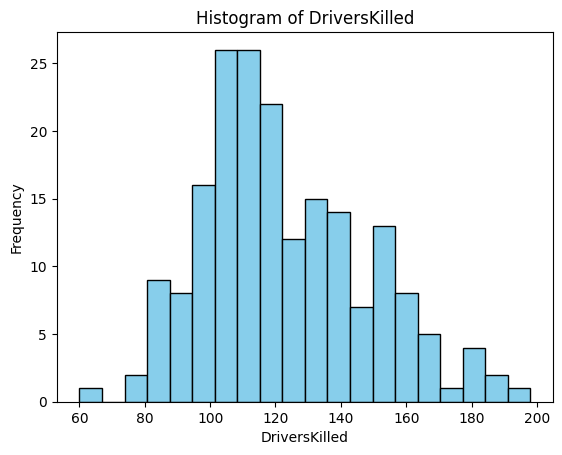

Shapiro-Wilk testas:
Testo statistika: 0.975567638874054
P-value: 0.0019376883283257484

Kolmogorovo-Smirnov testas:
Testo statistika: 1.0
P-value: 0.0


In [9]:
from scipy import stats
import matplotlib.pyplot as plt

# Gauti duomenys apie kintamąjį DriversKilled
drivers_killed_data = df['DriversKilled']

# Brėžiama histograma
plt.hist(drivers_killed_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of DriversKilled')
plt.xlabel('DriversKilled')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk testas normalumui patikrinti
shapiro_test_statistic, shapiro_p_value = stats.shapiro(drivers_killed_data)
print("Shapiro-Wilk testas:")
print("Testo statistika:", shapiro_test_statistic)
print("P-value:", shapiro_p_value)

# Kolmogorovo-Smirnov testas normalumui patikrinti
ks_test_statistic, ks_p_value = stats.kstest(drivers_killed_data, 'norm')
print("\nKolmogorovo-Smirnov testas:")
print("Testo statistika:", ks_test_statistic)
print("P-value:", ks_p_value)

- Shapiro-Wilk iki 5k imčių
- Kolmogorovo-Smirnov daugiau nei 5k imtys

Kadangi p-value < 0.05, tai neturi normalūmo.

-  p-value = 0.0019. Šis p-value rodo, kad yra labai maža tikimybė (mažesnė nei 0.1%), jog kintamojo „DriversKilled“ pasiskirstymas gali būti laikomas normaliuoju, remiantis statistiniu testu, kurį atlikote. Įprastai p-value mažesnis nei 0.05 (5%) yra interpretuojamas kaip pakankamas įrodymas atmesti hipotezę apie normalųjį pasiskirstymą.

- p-value didesnis nei 0.05 leidžia priimti nulinę hipotezę, kad kintamasis seka normalųjį pasiskirstymą. Vis dėlto, visada svarbu įvertinti kitus rodiklius ir atlikti papildomus testus bei grafines analizes (pvz., histogramas arba QQ plotus), kad patvirtintumėte šią išvadą, nes p-value tik informuoja apie statistinį tikėtinumą hipotezės atmetimui, bet negarantuoja pasiskirstymo tipo.


### 3. Ar galima teigti, kad kintamųjų Front ir Rear skirstiniai skirasi? 

In [15]:
from scipy.stats import shapiro

# Normalumo testas
statistic, p_value = shapiro(df['front'])
print("Statistika:", statistic)
print("P-reikšmė yra:", p_value)

print('')

# Normalumo testas
statistic, p_value = shapiro(df['rear'])
print("Statistika:", statistic)
print("P-reikšmė yra:", p_value)
# Tikriname statistinę reikšmingumą

Statistika: 0.9941620230674744
P-reikšmė yra: 0.6549763679504395

Statistika: 0.9858771562576294
P-reikšmė yra: 0.05159227177500725


### T testas

In [17]:
from scipy import stats

a = df['front']
b = df['rear']

# T-testas
t_statistic, p_value = stats.ttest_ind(a, b)

# Wilcoxon-Mann-Whitney U testas
u_statistic, wilcox_p_value = stats.mannwhitneyu(a, b)

print(p_value)

# Tikriname p-value
if p_value < 0.05:
    print("T-testo rezultatai: Skirstiniai skiriasi kadangi (p < 0.05)")
else:
    print("T-testo rezultatai: Duomenys nesiskiria statistiškai (p >= 0.05)")


5.48679756577699e-107
T-testo rezultatai: Skirstiniai skiriasi kadangi (p < 0.05)


### Jeigu p value mažiau už 0.05 tada Vilkoksono kriterijus taikomas


In [ ]:
# import pandas as pd
# from scipy.stats import wilcoxon

# # Atlikite Wilcoxon testą
# stat, p = wilcoxon(df['Front'], df['Rear'])

# print(f'Wilcoxon test statistic: {stat}, p-value: {p}')


- Kai abu kintamieji 0.05 pavlue, tada taikome T testą
- Kai 1 kintamasis mažiau už 0.05, o kitas daugiau už 0,05 tada taikome Vilkoksnono
- Kai abu kintamieji mažiau už 0.05 value tada taikome Vilkoksnono